Epoch 1/50
7/7 [==============================] - 2s 70ms/step - loss: 1.2348 - val_loss: 1.3619
Epoch 2/50
7/7 [==============================] - 0s 14ms/step - loss: 1.2286 - val_loss: 1.3546
Epoch 3/50
7/7 [==============================] - 0s 21ms/step - loss: 1.2229 - val_loss: 1.3477
Epoch 4/50
7/7 [==============================] - 0s 31ms/step - loss: 1.2175 - val_loss: 1.3419
Epoch 5/50
7/7 [==============================] - 0s 38ms/step - loss: 1.2130 - val_loss: 1.3358
Epoch 6/50
7/7 [==============================] - 0s 30ms/step - loss: 1.2083 - val_loss: 1.3302
Epoch 7/50
7/7 [==============================] - 0s 20ms/step - loss: 1.2040 - val_loss: 1.3248
Epoch 8/50
7/7 [==============================] - 0s 12ms/step - loss: 1.1994 - val_loss: 1.3196
Epoch 9/50
7/7 [==============================] - 0s 14ms/step - loss: 1.1952 - val_loss: 1.3137
Epoch 10/50
7/7 [==============================] - 0s 13ms/step - loss: 1.1908 - val_loss: 1.3079
Epoch 11/50
7/7 [============

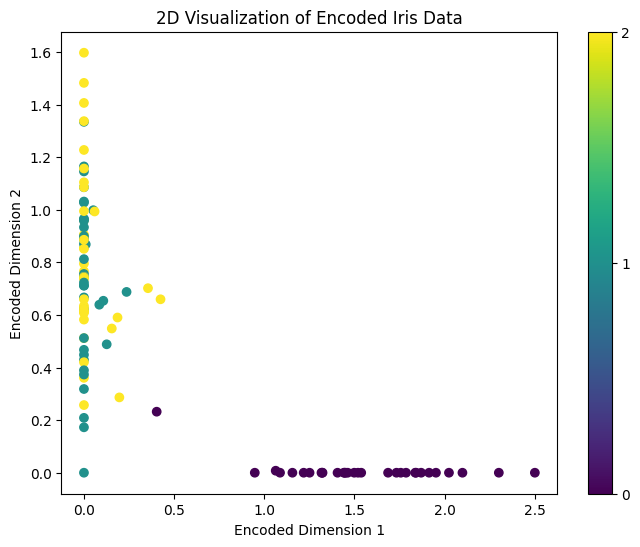

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and prepare the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 2  # Reduce to 2 dimensions for visualization

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoding layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model to extract the reduced representation
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, shuffle=True, validation_data=(X_test, X_test))

# Get the reduced representation of the data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_encoded[:, 0], X_train_encoded[:, 1], c=y_train, cmap='viridis')
plt.colorbar(scatter, ticks=[0, 1, 2])
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('2D Visualization of Encoded Iris Data')
plt.show()


In [3]:
data.shape

(1797, 64)

Epoch 1/100
7/7 [==============================] - 6s 162ms/step - loss: 1.1228 - val_loss: 1.2249
Epoch 2/100
7/7 [==============================] - 0s 61ms/step - loss: 1.1058 - val_loss: 1.2092
Epoch 3/100
7/7 [==============================] - 0s 41ms/step - loss: 1.0914 - val_loss: 1.1926
Epoch 4/100
7/7 [==============================] - 0s 66ms/step - loss: 1.0760 - val_loss: 1.1765
Epoch 5/100
7/7 [==============================] - 1s 81ms/step - loss: 1.0610 - val_loss: 1.1605
Epoch 6/100
7/7 [==============================] - 0s 63ms/step - loss: 1.0469 - val_loss: 1.1443
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 1.0323 - val_loss: 1.1289
Epoch 8/100
7/7 [==============================] - 0s 43ms/step - loss: 1.0181 - val_loss: 1.1145
Epoch 9/100
7/7 [==============================] - 0s 45ms/step - loss: 1.0047 - val_loss: 1.1009
Epoch 10/100
7/7 [==============================] - 0s 34ms/step - loss: 0.9915 - val_loss: 1.0882
Epoch 11/100
7/7 [

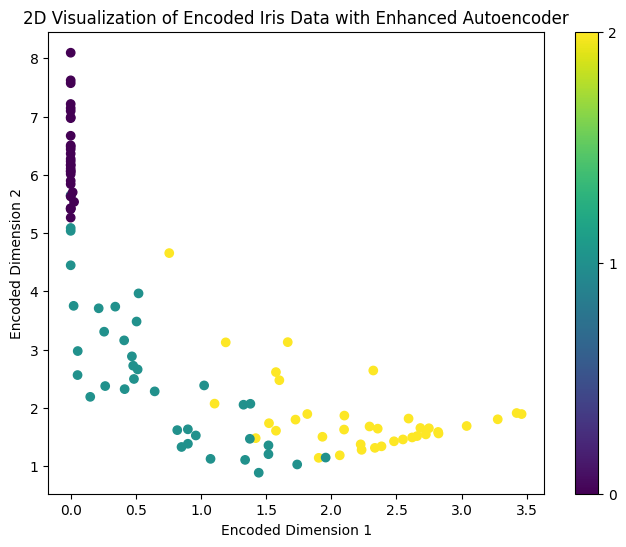

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and prepare the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target

# Standardize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 2  # Reduce to 2 dimensions for visualization

# Input layer
input_layer = Input(shape=(input_dim,))

# Hidden layer (additional layer for more complexity)
hidden_layer = Dense(8, activation='relu')(input_layer)

# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(hidden_layer)

# Decoding layer
decoded_hidden = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded_hidden)

# Autoencoder model
autoencoder = Model(input_layer, decoded)

# Encoder model to extract the reduced representation
encoder = Model(input_layer, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=16, shuffle=True, validation_data=(X_test, X_test))

# Get the reduced representation of the data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Visualization
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_encoded[:, 0], X_train_encoded[:, 1], c=y_train, cmap='viridis')
plt.colorbar(scatter, ticks=[0, 1, 2])
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('2D Visualization of Encoded Iris Data with Enhanced Autoencoder')
plt.show()
